In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("hour.csv")
df=pd.DataFrame(data=df)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
df.shape

(17379, 17)

In [5]:
# - instant: record index
# - dteday : date
# - season : season (1:winter, 2:spring, 3:summer, 4:fall)
# - yr : year (0: 2011, 1:2012)
# - mnth : month ( 1 to 12)
# - hr : hour (0 to 23)
# - holiday : weather day is holiday or not (extracted from [Web Link])
# - weekday : day of the week
# - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# + weathersit :
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# - temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
# - atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
# - hum: Normalized humidity. The values are divided to 100 (max)
# - windspeed: Normalized wind speed. The values are divided to 67 (max)
# - casual: count of casual users
# - registered: count of registered users
# - cnt: count of total rental bikes including both casual and registered

In [6]:
# we wont be needing instant column as it is just the index number so we will drop it
df=df.drop("instant",axis=1)
print(df.columns)

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


### EDA

In [7]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
#lets drop the date columns too

newdf=df.drop("dteday",axis=1)
newdf.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [9]:
newdf.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
newdf.shape

(17379, 15)

In [11]:
newdf["season"].value_counts()
#1:winter, 2:spring, 3:summer, 4:fall

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [12]:
newdf["yr"].value_counts()
#0:2011 , 1:2012

1    8734
0    8645
Name: yr, dtype: int64

In [13]:
newdf["mnth"].value_counts()
#1: jan.......12:dec

7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
11    1437
9     1437
4     1437
1     1429
2     1341
Name: mnth, dtype: int64

In [14]:
newdf["weekday"].value_counts()
#0: sunday...... 6:Saturday

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

In [15]:
newdf["holiday"].value_counts()
#0:not holiday,1:holiday 

0    16879
1      500
Name: holiday, dtype: int64

In [16]:
newdf["workingday"].value_counts()
# if day is neither weekend nor holiday is 1, otherwise is 0.

1    11865
0     5514
Name: workingday, dtype: int64

In [17]:
newdf["weathersit"].value_counts()
#1:clear,2:mist,3:lightsnow,4:heavy rain

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [18]:
#lets drop the casual and registered column too because it wont be of much use becaue we have a total count
newdf=newdf.drop("casual",axis=1)
newdf=newdf.drop("registered",axis=1)
newdf.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [19]:
#removing yr due to low varinace filter
newdf=newdf.drop("yr",axis=1) 

In [20]:
#we know our target variable is cnt and the rest are the independent variables

In [21]:
#lets look at the staistical summary of our data
newdf.describe()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [22]:
#check for nan values
newdf.isnull().sum()

season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

season           AxesSubplot(0.125,0.749828;0.168478x0.130172)
mnth          AxesSubplot(0.327174,0.749828;0.168478x0.130172)
hr            AxesSubplot(0.529348,0.749828;0.168478x0.130172)
holiday       AxesSubplot(0.731522,0.749828;0.168478x0.130172)
weekday          AxesSubplot(0.125,0.593621;0.168478x0.130172)
workingday    AxesSubplot(0.327174,0.593621;0.168478x0.130172)
weathersit    AxesSubplot(0.529348,0.593621;0.168478x0.130172)
temp          AxesSubplot(0.731522,0.593621;0.168478x0.130172)
atemp            AxesSubplot(0.125,0.437414;0.168478x0.130172)
hum           AxesSubplot(0.327174,0.437414;0.168478x0.130172)
windspeed     AxesSubplot(0.529348,0.437414;0.168478x0.130172)
cnt           AxesSubplot(0.731522,0.437414;0.168478x0.130172)
dtype: object

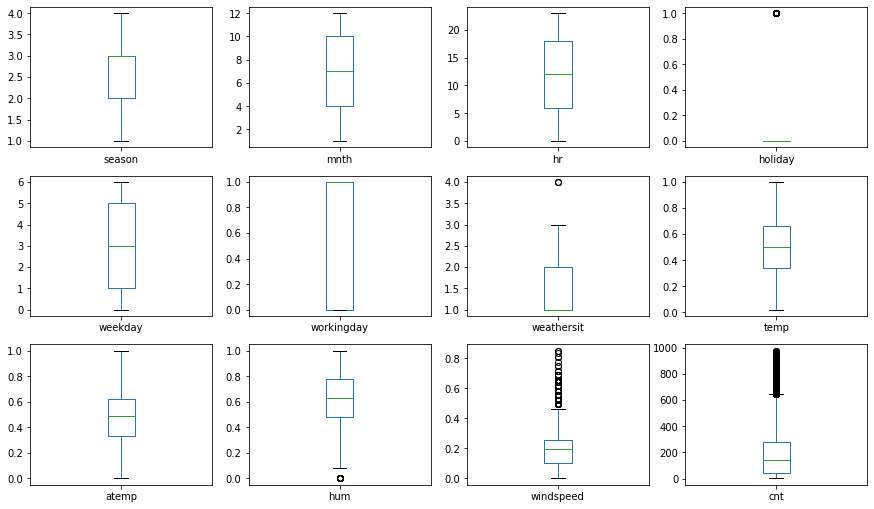

In [23]:
#checking for outliers

newdf.plot(kind="box",subplots=True,layout=(5,4),figsize=(15,15))

#there are some outliers present in holiday,humidity,windspeed,and count. we have to remove them

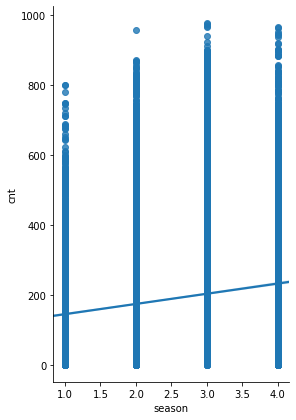

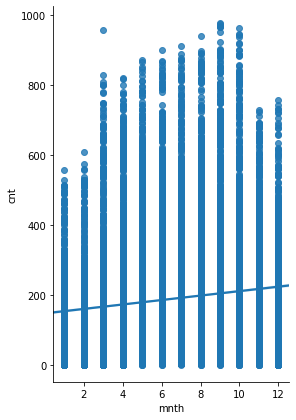

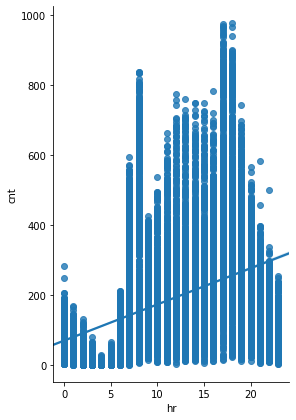

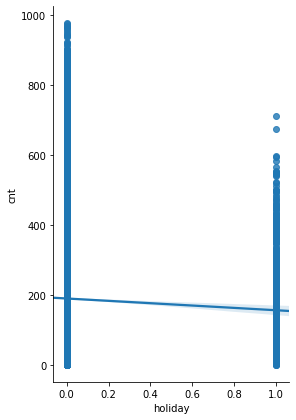

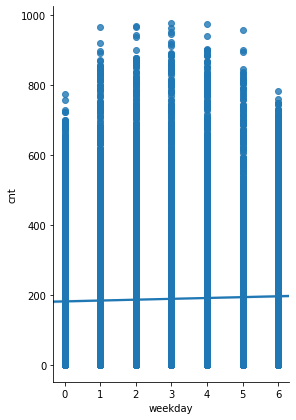

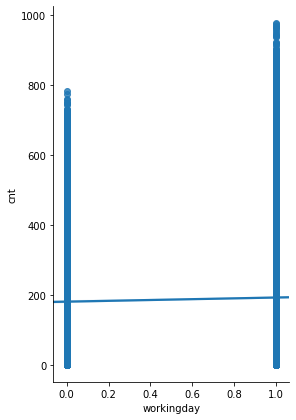

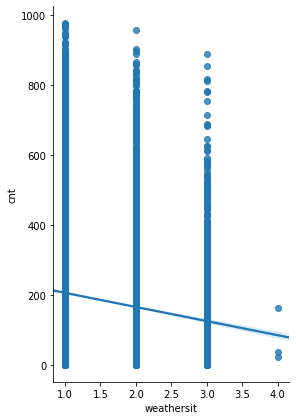

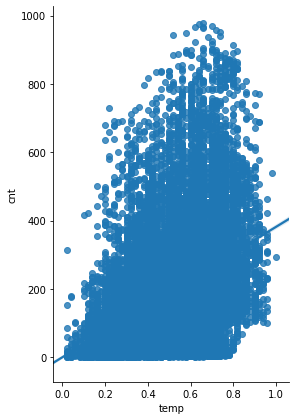

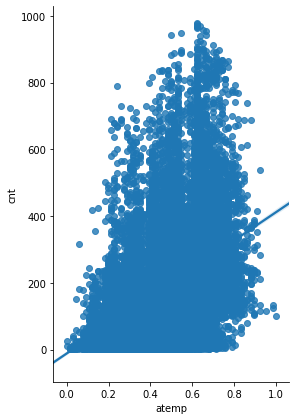

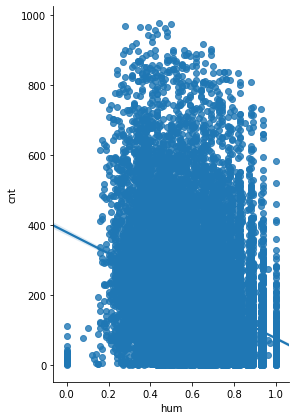

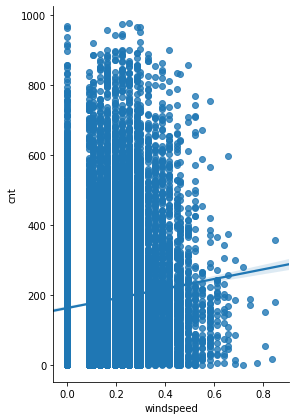

In [24]:
independent=newdf.iloc[:,:-1]
# independent.head()

for i in independent:
    
    sns.pairplot(x_vars=i,y_vars="cnt",data=newdf,kind="reg",size=6, aspect=0.7)
    

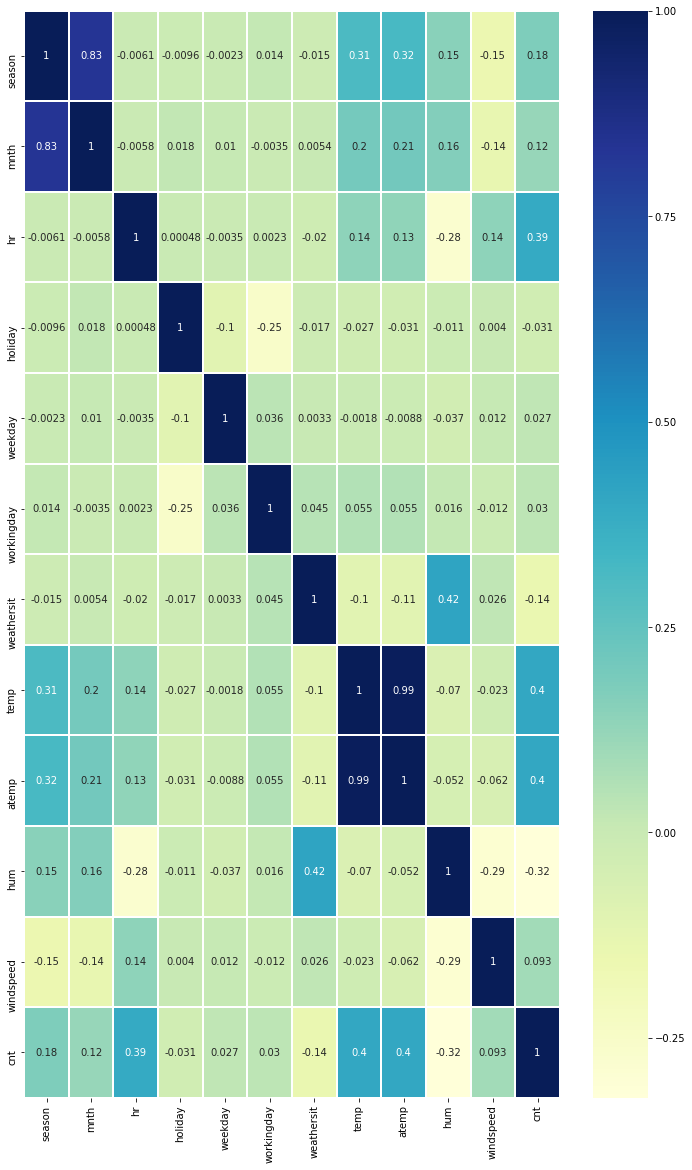

In [25]:
plt.figure(figsize=(12,20))
sns.heatmap(newdf.corr(),cmap="YlGnBu",annot=True,linewidth=1)

In [26]:
#handling the outliers
from scipy import stats
z=np.abs(stats.zscore(newdf))
print(z)

threshold=3
print(np.where(z>3))

#removing outliers
print("the shape of the dataframe before removing outliers",newdf.shape)
newdf = newdf[(z < 3).all(axis=1)]
print("the shape of the dataframe after removing outliers",newdf.shape)

[[1.3566343  1.61043792 1.67000398 ... 0.9473725  1.55388851 0.95633924]
 [1.3566343  1.61043792 1.52537422 ... 0.89553869 1.55388851 0.82402209]
 [1.3566343  1.61043792 1.38074446 ... 0.89553869 1.55388851 0.8681278 ]
 ...
 [1.3566343  1.58846698 1.36722104 ... 0.14113744 0.21169121 0.54836135]
 [1.3566343  1.58846698 1.51185081 ... 0.34847267 0.45609864 0.70824458]
 [1.3566343  1.58846698 1.65648057 ... 0.11803159 0.45609864 0.77440315]]
(array([  265,   372,   373,   374,   375,   376,   377,   378,   379,
         380,   381,   382,   383,   384,   385,   386,   387,   388,
         389,   390,   391,   392,   393,   394,   395,   467,   468,
         585,   870,  1007,  1009,  1010,  1014,  1017,  1018,  1105,
        1118,  1119,  1120,  1121,  1123,  1124,  1125,  1126,  1127,
        1157,  1158,  1159,  1160,  1161,  1162,  1163,  1164,  1165,
        1166,  1167,  1168,  1169,  1170,  1171,  1172,  1173,  1174,
        1175,  1176,  1177,  1178,  1179,  1180,  1258,  1259,  1

In [27]:
#feature selection
#we can see that weekday,holiday,wokingday,windspeed correlation with the cnt is so low that we can remove it from our model.

newdf=newdf.drop("windspeed",axis=1)
newdf=newdf.drop("holiday",axis=1)
newdf=newdf.drop("workingday",axis=1)
newdf=newdf.drop("weekday",axis=1)

# finaldf.columns

In [28]:
newdf.columns

Index(['season', 'mnth', 'hr', 'weathersit', 'temp', 'atemp', 'hum', 'cnt'], dtype='object')

### One hot encoding

Since we have categorical features in our data set, we need to tell our algorithm that classes have equal weight for our
analysis. for instance: our weekdays have values from 0-6 , but we cant really say that a 6 is better than a 5 here.

In [29]:
newdf.head()

,season,mnth,hr,weathersit,temp,atemp,hum,cnt
0,1,1,0,1,0.24,0.2879,0.81,16
1,1,1,1,1,0.22,0.2727,0.80,40
2,1,1,2,1,0.22,0.2727,0.80,32
3,1,1,3,1,0.24,0.2879,0.75,13
4,1,1,4,1,0.24,0.2879,0.75,1


In [30]:
newdf.shape

(16506, 8)

In [31]:
# making a for loop for the first 3 columns and then asking for the unique alphabets inside each of them by using .unique()
sorting=newdf.iloc[:,:3]
# print(sorting.head())
for col in sorting.columns:
    print(col,":",len(sorting[col].unique()),"labels")
# making a for loop for the weather sit column and then asking for the unique alphabets inside it by using .unique()    
print("weathersit",":",len(newdf["weathersit"].unique()),"labels")


season : 4 labels
mnth : 12 labels
hr : 24 labels
weathersit : 3 labels


In [32]:
#lets find the top 10 most frequent categories for the follwoing variables: mnth,hr
newdf["mnth"].value_counts().sort_values(ascending=False)

8     1428
12    1425
3     1422
5     1417
6     1416
7     1402
4     1368
10    1352
1     1347
11    1338
9     1333
2     1258
Name: mnth, dtype: int64

In [33]:
newdf["hr"].value_counts().sort_values(ascending=False)

7     705
23    704
0     703
22    703
20    702
21    702
9     701
6     701
11    700
19    700
10    700
16    700
14    700
1     699
15    698
13    695
5     695
12    694
2     690
3     677
4     676
8     663
18    607
17    591
Name: hr, dtype: int64

In [34]:
#lets make a list for the top 10 values for the following variable "mnth"

top10=[x for x in newdf["mnth"].value_counts().sort_values(ascending=False).head(10).index]
top10
#if i dont use index it wont give us the category name instead it will give the value associated with it

[8, 12, 3, 5, 6, 7, 4, 10, 1, 11]

In [35]:
for label in top10:
    newdf[label] = np.where(newdf["mnth"]==label,1,0)
    
newdf[["mnth"]+top10].head(20)

,mnth,8,12,3,5,6,7,4,10,1,11
0,1,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,1,0
6,1,0,0,0,0,0,0,0,0,1,0
7,1,0,0,0,0,0,0,0,0,1,0
8,1,0,0,0,0,0,0,0,0,1,0
9,1,0,0,0,0,0,0,0,0,1,0


In [36]:
print(newdf.head())
print(newdf.shape)

   season  mnth  hr  weathersit  temp   atemp   hum  cnt  8  12  3  5  6  7  \
0       1     1   0           1  0.24  0.2879  0.81   16  0   0  0  0  0  0   
1       1     1   1           1  0.22  0.2727  0.80   40  0   0  0  0  0  0   
2       1     1   2           1  0.22  0.2727  0.80   32  0   0  0  0  0  0   
3       1     1   3           1  0.24  0.2879  0.75   13  0   0  0  0  0  0   
4       1     1   4           1  0.24  0.2879  0.75    1  0   0  0  0  0  0   

   4  10  1  11  
0  0   0  1   0  
1  0   0  1   0  
2  0   0  1   0  
3  0   0  1   0  
4  0   0  1   0  
(16506, 18)


In [37]:
newdf.rename(inplace=True,columns={8:"aug",12:"dec",3:"mar",5:"may",6:"june",7:"july",4:"apr",
                     10:"oct",1:"jan",11:"nov"})

In [38]:
#lets make a list for the top 10 values for the following variable "hr"
top_10=[x for x in newdf["hr"].value_counts().sort_values(ascending=False).head(10).index]
top_10

[7, 23, 0, 22, 20, 21, 9, 6, 11, 19]

In [39]:
for label in top_10:
    newdf[label] = np.where(newdf["hr"]==label,1,0)
    
newdf[["hr"]+top_10].head(20)

,hr,7,23,0,22,20,21,9,6,11,19
0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,1,0,0
7,7,1,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,1,0,0,0


In [40]:
newdf.head()

,season,mnth,hr,weathersit,temp,atemp,hum,cnt,aug,dec,...,7,23,0,22,20,21,9,6,11,19
0,1,1,0,1,0.24,0.2879,0.81,16,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,1,1,0.22,0.2727,0.80,40,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2,1,0.22,0.2727,0.80,32,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,3,1,0.24,0.2879,0.75,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,4,1,0.24,0.2879,0.75,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
newdf.columns

Index([    'season',       'mnth',         'hr', 'weathersit',       'temp',
            'atemp',        'hum',        'cnt',        'aug',        'dec',
              'mar',        'may',       'june',       'july',        'apr',
              'oct',        'jan',        'nov',            7,           23,
                  0,           22,           20,           21,            9,
                  6,           11,           19],
      dtype='object')

In [42]:
newdf.shape

(16506, 28)

In [43]:
#just changing the name of the columns so that is will be easier to understand
newdf.rename(inplace=True,columns={7:"7hr",23:"23hr",0:"0hr",22:"22hr",20:"20hr",21:"21hr",9:"9hr",
                     6:"6hr",11:"11hr",19:"19hr"})

In [44]:
print(newdf.columns)
print(newdf.shape)

Index(['season', 'mnth', 'hr', 'weathersit', 'temp', 'atemp', 'hum', 'cnt',
       'aug', 'dec', 'mar', 'may', 'june', 'july', 'apr', 'oct', 'jan', 'nov',
       '7hr', '23hr', '0hr', '22hr', '20hr', '21hr', '9hr', '6hr', '11hr',
       '19hr'],
      dtype='object')
(16506, 28)


In [45]:
#now doing the one hot encoding for the varible season

seasons=pd.get_dummies(newdf["season"],drop_first=True)

seasons.rename(inplace=True,columns={2:"spring",3:"summer",4:"fall"})

seasons.head(10)

,spring,summer,fall
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [46]:
#now doing the one hot encoding for the varible weathersit

wsit=pd.get_dummies(newdf["weathersit"],drop_first=True)
wsit.rename(inplace=True,columns={2:"mist",3:"lightsnow"})

wsit.head(10)

,mist,lightsnow
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


In [47]:
#now its time to concate the newly formed columns : seasons and wsit

newdf=pd.concat([newdf,seasons,wsit],axis=1)
newdf.head()

,season,mnth,hr,weathersit,temp,atemp,hum,cnt,aug,dec,...,21hr,9hr,6hr,11hr,19hr,spring,summer,fall,mist,lightsnow
0,1,1,0,1,0.24,0.2879,0.81,16,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0.22,0.2727,0.80,40,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2,1,0.22,0.2727,0.80,32,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,3,1,0.24,0.2879,0.75,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,4,1,0.24,0.2879,0.75,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#now we can drop the columns which we have label encoded for

newdf.drop(["season","mnth","hr","weathersit"],axis=1,inplace=True)
newdf.head()

,temp,atemp,hum,cnt,aug,dec,mar,may,june,july,...,21hr,9hr,6hr,11hr,19hr,spring,summer,fall,mist,lightsnow
0,0.24,0.2879,0.81,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.22,0.2727,0.80,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.22,0.2727,0.80,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.24,0.2879,0.75,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.2879,0.75,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
newdf.shape

(16506, 29)

In [50]:
#In the above heatmap we can see that temp and a temp are highly corerelated with each other, and have the,
#same correlated effect on the target varibale "cnt". So hence we can remove any one of the two columns,
#In my case i will remove the atemp column,because the temp column is more intuitive.

newdf=newdf.drop("atemp",axis=1)

In [51]:
newdf.columns

Index(['temp', 'hum', 'cnt', 'aug', 'dec', 'mar', 'may', 'june', 'july', 'apr',
       'oct', 'jan', 'nov', '7hr', '23hr', '0hr', '22hr', '20hr', '21hr',
       '9hr', '6hr', '11hr', '19hr', 'spring', 'summer', 'fall', 'mist',
       'lightsnow'],
      dtype='object')

## Principal Component Analysis

As we we will applying pca on temp and atemp, first we will scale the data using standardscaler

In [52]:
#if i would have not removed the atemp column in the above line, i would have done a pca on both the columns,
#PCA and scaling for the two columns(temp,atemp) is shown below in the comments

In [53]:
# from sklearn.preprocessing import StandardScaler

# scaler=StandardScaler()
# scaler.fit(newdf.iloc[:,:2])

In [54]:
# scaled_data=scaler.transform(newdf.iloc[:,:2])

In [55]:
# scaled_data

Now the scaling is done, so i can now move onto doing PCA on the two columns(temp,atemp) 

In [56]:
# from sklearn.decomposition import PCA

# pca=PCA(n_components=1)
# pca.fit(scaled_data)

In [57]:
# x_pca=pca.transform(scaled_data)

In [58]:
# scaled_data.shape

In [59]:
# x_pca.shape

In [60]:
# pca_temp=pd.DataFrame(data=x_pca)

In [61]:
# pca_temp.head()

In [62]:
# pca_temp[0].value_counts()

## splitting into training and testing

In [63]:
newdf.columns

Index(['temp', 'hum', 'cnt', 'aug', 'dec', 'mar', 'may', 'june', 'july', 'apr',
       'oct', 'jan', 'nov', '7hr', '23hr', '0hr', '22hr', '20hr', '21hr',
       '9hr', '6hr', '11hr', '19hr', 'spring', 'summer', 'fall', 'mist',
       'lightsnow'],
      dtype='object')

In [64]:
# these are our independent variables
x=newdf.loc[:,['temp', 'hum', 'aug', 'dec', 'mar', 'may', 'june', 'july', 'apr',
       'oct', 'jan', 'nov', '7hr', '23hr', '0hr', '22hr', '20hr', '21hr',
       '9hr', '6hr', '11hr', '19hr', 'spring', 'summer', 'fall', 'mist',
       'lightsnow']]
x.columns

Index(['temp', 'hum', 'aug', 'dec', 'mar', 'may', 'june', 'july', 'apr', 'oct',
       'jan', 'nov', '7hr', '23hr', '0hr', '22hr', '20hr', '21hr', '9hr',
       '6hr', '11hr', '19hr', 'spring', 'summer', 'fall', 'mist', 'lightsnow'],
      dtype='object')

In [65]:
#this is our target varible
y=newdf["cnt"]
y.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

## Model Selection

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor

Now i have applied 6 linear regression algorithms:
1)LinearRegression()
2)Lasso()
3)Ridge()
4)RandomForestRegressor()
5)ExtraTreesRegressor()
6)GradientBoositngRegressor()

Out of the 6 extratrees outperformed every other algorithm. As the Training time for the follwing codes is a little long,
so i have commented out the code.

In [67]:
# count=0
# numbers=range(101)
# model=[LinearRegression(),Lasso(),Ridge()]
# for m in model:
#     for number in numbers:
#         x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=number)
# #         m=LinearRegression()
#         m.fit(x_train,y_train)
#         score=m.score(x_train,y_train)
#         y_pred=m.predict(x_test)
#         print("the score for the corresponding random state",number,"is",score)

#         if score>count:
#             count=score
#             final_number=number
#     print("The model used is :", m)
#     print("\n")
#     print("the max score for the model",m,"with random state",final_number,"is",count)
#     print("\n")
# print("\n")
# print("the max score for random state",final_number,"is",count)
        

In [68]:
# count=0
# numbers=range(101)
# model=[RandomForestRegressor(n_estimators=200),ExtraTreesRegressor(n_estimators=200),GradientBoostingRegressor(n_estimators=100)]
# for m in model:
#     for number in numbers:
#         x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=number)
# #         
#         m.fit(x_train,y_train)
#         score=m.score(x_train,y_train)
#         y_pred=m.predict(x_test)
#         print("the score for the corresponding random state",number,"is",score)

#         if score>count:
#             count=score
#             final_number=number
#     print("The model used is :", m)
#     print("\n")
#     print("the max score for the model",m,"with random state",final_number,"is",count)
#     print("\n")
# print("\n")
# print("the max score for random state",final_number,"is",count)

In [69]:
#as i can see that extratreesregressor has outperformed all the other regression algorithms.
#now i will use GridSearchCv to select the hyperparameter for extratreesregressor()

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=34)
etr=ExtraTreesRegressor(n_estimators=200)        
etr.fit(x_train,y_train)
score=etr.score(x_train,y_train)
y_pred=etr.predict(x_test)

print(score)
print("\n")
print(etr.score(x_test,y_test))

0.84182181498902


0.20811299736242594


In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [72]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)
rmsle=np.sqrt(metrics.mean_squared_log_error(y_test,y_pred))
print(rmsle)

98.31897647134716
22222.159572371653
149.0709883658509
1.2374955923309467


## Grid Search CV

In [73]:
# from sklearn.model_selection import GridSearchCV

# parameters=[{"n_estimators":[25,100,150,200],"criterion":["mse"]},
#            {"n_estimators":[25,100,150,200],"criterion":["mae"]}]
# #            {"n_estimators":[25,100,150,200],"criterion":["mse"],"max_depth":[5,10,15,20,20,None],"max_sample_split":[2,5,10]},
# #            {"n_estimators":[25,100,150,200],"criterion":["mae"],"max_depth":[5,10,15,20,25,None],"max_sample_split":[2,5,10]}]

# grid_search=GridSearchCV(etr,
#                         parameters,
#                         cv=3,
#                         n_jobs=2)
# grid_search=grid_search.fit(x_train,y_train) 
# %time

As the gridsearchcv took me quite long to get the best hyper-parameters for the given hyperparameters, i have commented out
the code.

In [75]:
# grid_search.best_score_
#using this to get the best gridsearch score

In [76]:
# grid_search.best_params_
#using this to get the best gridsearch parameters

In [77]:
from sklearn.metrics import r2_score

In [78]:
r2_score(y_test,y_pred)

0.20811299736242594

In [80]:
etr.get_params()

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [88]:
# from sklearn.model_selection import GridSearchCV

# parameters=[{"n_estimators":[200],
#              "criterion":["mae"],
#              "max_depth":[5,10,15,20,20,None],
#              "max_leaf_nodes":[2,5,10,None],
#              "min_samples_split":[2,5,10]}]

           
# grid_search=GridSearchCV(etr,
#                         parameters,
#                         cv=3,
#                         n_jobs=-1)
# grid_search=grid_search.fit(x_train,y_train) 
# %time